# 5. Complex waves

Complex numbers are extremely useful for describing the propagation of waves. This includes electromagnetic waves (radio waves, visible light, X-rays, etc.), sound waves, quantum mechanical wavefunctions, and more. It is therefore very important for physicists to have a good understanding of the complex description of wave phenomena.

## The wave equation

To describe wave propagation in space and time, we use a [partial differential equation](01_derivatives.ipynb#PDE) (PDE) known as the **time-dependent wave equation**.  For simplicity, we restrict our attention to a single spatial coordinate, denoted $x$.  The time coordinate is denoted $t$. We describe a wave using a function $f(x,t)$, called the **wavefunction**, which specifies the value of some measurable physical quantity at each position $x$ and time $t$.  For instance, for a sound wave $f(x,t)$ stands for the pressure of the air at that position and time.

The time-independent wave equation is:

$$\frac{\partial^2 f}{\partial x^2} = \frac{1}{v^2} \frac{\partial^2 f}{\partial t^2}, \;\;\; v \in\mathbb{R}^+.$$

The parameter $v$, which we currently assume to be a positive real constant, is called the **wave speed**.  The reason for this will shortly become clear.

For neatness, we sometimes write the wave equation by putting everything on one side:

$$\left(\frac{\partial^2}{\partial x^2} - \frac{1}{v^2} \frac{\partial^2}{\partial t^2}\right) \; f(x,t) = 0.$$

### Real solutions to the wave equation

We first consider real solutions to the wave equation. There exists a family of solutions known as **travelling waves**, which have the form

$$f(x,t) = f_0 \, \cos\big(kx - \omega t + \phi\big)\;\;\mathrm{where}\;\; \left|\frac{\omega}{k}\right| = v.$$

By direct substitution, you can verify that this satisfies the PDE.  Here, $f_0$ is called the **amplitude** of the wave, $\phi$ is the **phase**, $\omega$ is the **frequency**, and $k$ is the **wavenumber**. (Note: some authors call $\omega$ the "angular frequency", reserving the term "frequency" for the quantity $f = \omega/2\pi$.  But we'll simply deal in terms of $\omega$ rather than $f$, and call $\omega$ the frequency.)  By convention, we usually take $\omega > 0$. The frequency and wavenumber are inversely related to the **period** $T = 2\pi/\omega$ and the **wavelength** $\lambda = 2\pi/|k|$.

This solution describes a sinusoidal wave, as shown in the figure below:

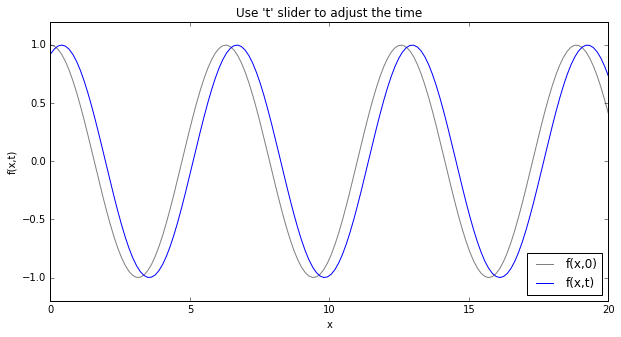

In [3]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, cos
import matplotlib.pyplot as plt

def plot_traveling_wave(t, k, omega, f0, phi):
    x  = linspace(0, 20., 150)
    y  = f0 * cos(k*x - omega*t + phi)
    y0 = f0 * cos(k*x + phi)
    plt.figure(figsize=(10,5))
    plt.plot(x, y0, color='grey', label="f(x,0)")
    plt.plot(x, y,  color='blue', label="f(x,t)")
    plt.title("Use 't' slider to adjust the time")
    plt.xlim(x[0], x[-1])
    plt.ylim(-1.2, 1.2)
    plt.xlabel('x')
    plt.ylabel('f(x,t)')
    plt.legend(loc='lower right')

interact(plot_traveling_wave,
         t    = FloatSlider(min=0.0,  max=20.0, step=0.1,  value=0.4),
         k    = FloatSlider(min=-2.0, max=2.0,  step=0.1,  value=1.0),
         omega= FloatSlider(min=1.0,  max=2.0,  step=0.1,  value=1.0),
         f0   = FloatSlider(min=0.0,  max=1.0,  step=0.1,  value=1.0),
         phi  = FloatSlider(min=0.0,  max=6.28, step=0.01, value=0.0));

Observe that the wave moves to the right for positive $k$, or to the left for negative $k$. Here's why: consider a small change in time, $\delta t$. If, together with this time shift, we change $x$ by $\delta x = \omega \delta t / k$, then the change in the $kx$ term and the change in the $\omega t$ term in $\cos(kx - \omega t + \phi)$ would cancel each other, leaving the value of the cosine unchanged.  This means that the wave shifts by $\delta x$ during the time interval $\delta t$.  The wave velocity is

$$\textrm{velocity} \; = \, \frac{\delta x}{\delta t} = \frac{\omega \delta t / k}{\delta t} = \frac{\omega}{k}.$$

Note that we have adopted the convention that $\omega > 0$.  The above equation tells us that the sign of the wave-number determines the propagation direction: positive $k$ means positive wave velocity (a right-moving wave), and negative $k$ means negative wave velocity (a left-moving wave). We can also compute the wave speed by taking the absolute value of the velocity:

$$\textrm{speed}\; = \, \left|\frac{\delta x}{\delta t}\right| = \left|\frac{\omega}{k}\right| = v.$$

The travelling wave solution is valid for *any* $\omega > 0$. For sound waves, these different frequencies correspond to the human sensation of pitch. For light waves, the different frequencies correspond to color. Since $|k| = \omega/v$, higher frequencies correspond to larger wavenumbers, i.e. shorter wavelengths.

The wave equation is a **linear** PDE, meaning that any linear superposition of solutions is also a solution.  (You can prove this by direct substitution.) For instance, suppose we have two travelling wave solutions, with equal amplitude and frequency, moving in opposite directions:

$$f(x,t) = f_0 \, \cos(kx - \omega t + \phi_1) + A \cos(-kx - \omega t + \phi_2),$$

for some $k = \omega/c$.  Such a superposition is a solution to the wave equation known as a **standing wave**:

$$f(x,t) = 2f_0 \, \cos\big[kx + (\phi_1-\phi_2)/2\big]\, \cos\big[\omega t - (\phi_1+\phi_2)/2\big].$$

This is easily proven for the simplest case, $\phi_1 = \phi_2 = 0$.  For arbitrary $\phi_1, \phi_2$, the proof involves simple but tedious applications of the trignometric addition formulas.

### Complex solutions to the wave equation

It is much easier to deal with the wave equation if we look at *complex* solutions, by allowing the wavefunction $f(x,t)$ to take on complex values.  (Note: only the value of the wavefunction is complex; we continue to assume that $x$ and $t$ are real.) Since the wave equation is a linear PDE, the real part of any complex solution is a valid real solution:

$$\left(\frac{\partial^2}{\partial x^2} - \frac{1}{v^2} \frac{\partial^2}{\partial t^2}\right) f(x,t) = 0 \;\;\;\Rightarrow \;\;\; \left(\frac{\partial^2}{\partial x^2} - \frac{1}{v^2} \frac{\partial^2}{\partial t^2}\right) \mathrm{Re}\left[f(x,t)\right] = 0.$$

There is a very nice set of complex solutions to the wave equation, known as **complex travelling waves**, which take the form

$$f(x,t) = A \, e^{i(kx - \omega t)} \quad\mathrm{where}\;\; \left|\frac{\omega}{k}\right| = v.$$

Again, you can verify by direct substitution that this satisfies the PDE.  The complex constant $A$ is called the **complex amplitude** of the wave.

Now, consider what happens if we take the real part of the above solution:

$$\begin{aligned}\mathrm{Re}\Big\{A \, e^{i(kx - \omega t)}\Big\} &= \mathrm{Re}\Big\{ \left(\big|A\big|\, e^{i\mathrm{arg}[A]}\right) \; e^{i(kx - \omega t)}\Big\} \\ &= \big|A\big|\; \mathrm{Re}\Big\{ e^{i\mathrm{arg}[A]} \, e^{i(kx - \omega t)}\Big\} \\ &= \big|A\big|\; \cos\big(kx - \omega t + \mathrm{arg}[A]\big)\end{aligned}$$

Here, we have made use of the [polar representation](03_complex_numbers.ipynb#polar) of the complex amplitude $A$.  Evidently, the magnitude $|A|$ serves as the *real* wave amplitude, while $\mathrm{arg}(A)$ serves as the phase factor $\phi$. In this sense, the complex solution is more mathematically succinct: a single complex parameter $A$ combines the roles of two separate parameters in the real solution.

The complex representation makes wave superpositions much easier to handle. For example, consider again the superposition of two counter-propagating waves of equal amplitude and frequency, with arbitrary phases. Using complex travelling waves, we can calculate the superposition
using a few lines of complex algebra:

$$\begin{aligned}f(x,t) &= \displaystyle \big|A\big| \, e^{i(kx - \omega t + \phi_1)} + \big|A\big| \, e^{i(-kx - \omega t + \phi_2)} \\ &= \displaystyle \big|A\big|\, \left(e^{i(kx + \phi_1)} + e^{-i(kx - \phi_2)}\right)\, e^{-i\omega t} \\ &= \displaystyle \big|A\big|\, \left(e^{i[kx + (\phi_1-\phi_2)/2]} + e^{-i[kx + (\phi_1 - \phi_2)/2]}\right)\, e^{i(\phi_1 + \phi_2)/2} \,e^{-i\omega t} \\ &= \displaystyle 2\big|A\big|\, \cos\left[kx + (\phi_1-\phi_2)/2\right] \,e^{-i[\omega t -(\phi_1+\phi_2)/2]}\end{aligned}$$

Taking the real part then yields the result that we had previously obtained using trigonometric formulas.

## Waves in 3D space<a name="3dwaves"></a>

The wave equation can be easily generalized to three spatial dimensions.  We replace $f(x,t)$ with a wavefunction that depends on three spatial coordinates, $f(x,y,z,t)$.  The second-order derivative in $x$ is replaced by second-order derivatives in each spatial direction.  The generalized PDE is:

$$\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} - \frac{1}{v^2} \frac{\partial^2}{\partial t^2}\right) \; f(x,y,z,t) = 0.$$

This PDE supports complex travelling wave solutions of the form

$$f(x,y,z,t) = A \, e^{i(\vec{k} \cdot \vec{r} - \omega t)},$$

where

$$\vec{k} = \begin{bmatrix}k_x\\k_y\\k_z\end{bmatrix}, \;\;\; \vec{r} = \begin{bmatrix}x\\y\\z\end{bmatrix}, \;\;\;\frac{\omega}{\sqrt{k_x^2 + k_y^2 + k_z^2}} = v.$$

Again, you can verify that this is a solution by direct substitution.  We call $\vec{k}$ the **wave-vector**, which generalizes the wave-number parameter in the solution for 1D space.  The direction of the wave-vector specifies the spatial direction in which the wave travels.

## Harmonic waves

We are often interested in waves undergoing **harmonic oscillation**, i.e. varying sinusoidally with a constant frequency $\omega$.  Such waves can be described by wavefunctions of the form

$$f(x,y,z,t) = \psi(x,y,z) \, e^{-i\omega t}.$$

By writing a wavefunction in this form, we are performing a **separation of variables**, which means specializing to solutions consisting of two factors, one depending only on $\vec{r}$ and the other only on $t$. This is a common method for simplifying PDEs, and is justified by the linearity of the wave equation.  If we can find harmonic solutions for each frequency $\omega$, then we can linearly combine them to form more general solutions.  As we shall see when discussing [Fourier transforms](09_fourier_transform.ipynb), such superpositions can be used to construct a general set of solutions to the PDE.

By direct substitution into the [3D wave equation](#3dwaves), we can show that $\psi(x)$ satisfies the differential equation

$$\left[\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} + \left(\frac{\omega}{v}\right)^2\right] \, \psi(x,y,z) = 0.$$

This is related to the original time-dependent wave equation by the replacement of each $\partial/\partial t$ with $-i\omega$.  Thus, it contains $\omega$ as a numerical parameter.

### Waves in complex media

So far, our discussion has been limited to waves propagating in a uniform, energy-conserving medium that has a fixed wave speed $v$. There are two important generalizations of this scenario: (i) non-uniform media, in which the wave speed varies with position, and (ii) energy non-conserving media, in which the waves lose or gain energy as they propagate.  To capture these phenomena, we replace the constant $v$ by

$$v = \frac{c}{n},$$

where $n$ is called the **refractive index**, and the constant $c$ is the wave speed in the limit $n = 1$.  In the case of electromagnetic waves, $c$ is called the "speed of light in a vacuum".

If the refractive index is now allowed to vary with position, the wave equation becomes

$$\left[\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} + n^2(x,y,z)\, \left(\frac{\omega}{c}\right)^2\right] \, \psi(x,y,z) = 0.$$

This PDE describes harmonic waves of fixed frequency $\omega$ propagating within the medium described by $n(x,y,z)$.

### Wave amplification and attenuation

If the refractive index $n$ is allowed to be *complex*, the wave equation can describe **wave amplification** (gain) and **wave attenuation** (loss).  In physics, amplified waves are the underlying basis for [lasers](https://en.wikipedia.org/wiki/Laser), while attenuated waves describe the absorption of light into "black" objects, or the dissipation of sound into ambient heat. To study these phenomena, let us go back to one-dimensional space and assume that the refractive index is position-independent:

$$\left[\frac{d^2}{d x^2} + n^2\, \left(\frac{\omega}{c}\right)^2\right] \, \psi(x) = 0, \quad n \in \mathbb{C}.$$

The solutions to this ODE have the form<a name="gainloss_wave"></a>

$$\psi(x) = A e^{\pm ikx},\;\;\;\mathrm{where}\;\; A \in \mathbb{C}, \;k = \frac{n\omega}{c}.$$

As before, we let $\omega, c \in \mathbb{R}^+$.  If $n$ is a complex number with a non-zero imaginary part, then $k$ is likewise complex.  Specifically, if we write

$$n = n' + i n'',$$

where $n'$ and $n''$ are the real and imaginary parts of the refractive index, then

$$\psi(x) = A e^{\pm in'(\omega/c)x}\, e^{\mp n''(\omega/c)x}.$$

The first exponential factor describes the oscillation of the wavefunction, with the $\pm$ sign determining whether the harmonic wave is moving to the right (positive wave-number) or to the left (negative wave-number). The second exponential describes the amplification or attenuation of the wave.  If $n'' \ne 0$, the amplitude varies exponentially with $x$.  An increase in the direction of propagation describes an amplified wave; a decrease in the direction of propagation describes an attenuated wave. The behavior of the wavefunction can be explored in the plot below.

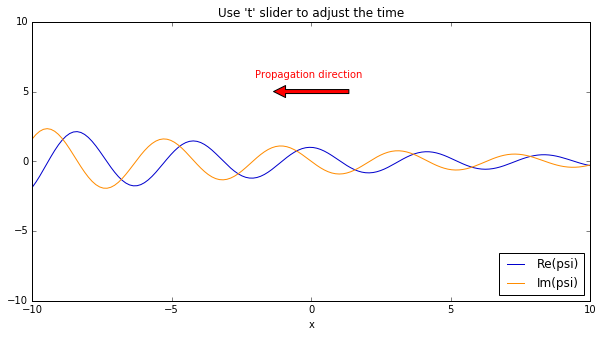

In [22]:
%matplotlib inline
from ipywidgets import interact, FloatSlider, ToggleButtons
from numpy import linspace, exp, sign
import matplotlib.pyplot as plt

def plot_complex_wave(sgn, n1, n2, omega, absa, arga):
    ylim, arrowx, arrowy = 10.0, 1.5, 5.
    textx, texty = -2., 6.
    A    = absa * exp(1j*arga)
    x    = linspace(-10., 10., 150)
    
    if sgn == '+':
        s = 1.
    else:
        s = -1.

    ## Plot the wavefunction
    psi = A * exp(1j*s*(n1+1j*n2)*omega*x)
    plt.figure(figsize=(10,5))
    plt.plot(x, psi.real, color='mediumblue', label="Re(psi)")
    plt.plot(x, psi.imag, color='darkorange', label="Im(psi)")

    ## Plot the direction of travel as a guide to the eye.
    direction = arrowx * s
    plt.annotate('', xy=(direction, arrowy),
                 xytext=(-direction, arrowy),
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.text(textx, texty, 'Propagation direction', color='red')

    ## Axis labels, etc.
    plt.title("Use 't' slider to adjust the time")
    plt.xlim(x[0], x[-1])
    plt.ylim(-ylim, ylim)
    plt.xlabel('x')
    plt.legend(loc='lower right')

interact(plot_complex_wave,
         sgn  = ToggleButtons(description='Sign in exponent', options=['+', '-']),
         n1   = FloatSlider(min=1.0,  max=4.0, step=0.1,  value=1.5, description='Re(n)'),
         n2   = FloatSlider(min=-0.3, max=0.3,  step=0.01,  value=0.1, description='Im(n)'),
         omega= FloatSlider(min=0.1,  max=2.0,  step=0.1,  value=1.0, description='omega/c'),
         absa = FloatSlider(min=0.0,  max=2.0,  step=0.1,  value=1.0, description='|A|'),
         arga = FloatSlider(min=-3.14,  max=3.14, step=0.01, value=0.0, description='arg(A)'));

## Exercises

<ol>
<li>Consider the 1D wave equation in a enclosed box of length $L$ and uniform refractive index $n\in\mathbb{R}$.  Let the walls of the box be at $x = -L/2$ and $x = L/2$, and let the wavefunction go to zero at these points: $\psi(\pm L/2) = 0$.  For this boundary conditions, show that $\psi(x) = 0$ for all $x$, *except* for certain discrete values of the frequency $\omega$.  Find these frequencies, and the corresponding non-zero solutions $\psi(x)$.</li>
<li>
What determines whether the [travelling-wave solution](#gainloss_wave) is amplified, rather than attenuated? Can a wave equation with given complex refractive index $n$ possess both amplified wave solutions and attenuated wave solutions?</li>
<li>
When the refractive index is complex, can the real part of the complex wavefunction be regarded as the solution to the same wave equation? If not, derive a real differential equation whose solution is the real part of the [complex travelling wave solution](#gainloss_wave).</li>
</ol>